# Assignment 1

In [ ]:
pip install -U scikit-learn

In [20]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import data
train_data = 'data/adult.data'
test_data = 'data/adult.test'

# Add attribute names to each column
columns = ['Age','Workclass','fnlgwt','Education','EdNum','MaritalStatus',
           'Occupation','Relationship','Race','Sex','CapitalGain',
           'CapitalLoss','HoursPerWeek','Country','Income']
df_train_set = pd.read_csv(train_data, names=columns)

# The first line of data is useless, skip
df_test_set = pd.read_csv(test_data, names=columns, skiprows=1) 
df_train_set.head()


,Age,Workclass,fnlgwt,Education,EdNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
df_test_set.head()

,Age,Workclass,fnlgwt,Education,EdNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
df_train_set.describe()

,Age,fnlgwt,EdNum,CapitalGain,CapitalLoss,HoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
df_test_set.describe()

,Age,fnlgwt,EdNum,CapitalGain,CapitalLoss,HoursPerWeek
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


## Data pre-processing

In [13]:
# data pre-processing：data delete & cleaning
# delete the column fnlgwt
df_train_set.drop('fnlgwt', axis=1, inplace=True) 
df_test_set.drop('fnlgwt', axis=1, inplace=True)

# clean the data：replace the ‘？’ with ’Unknown‘
for i in df_train_set.columns:
    df_train_set[i].replace('?', 'Unknown', inplace=True)
    df_test_set[i].replace('?', 'Unknown', inplace=True)
    
# remove dot and space from non-int64 type data
    for col in df_train_set.columns:
        if df_train_set[col].dtype != 'int64':
            df_train_set[col] = df_train_set[col].apply(lambda val: val.replace(" ", ""))
            df_train_set[col] = df_train_set[col].apply(lambda val: val.replace(".", ""))
            df_test_set[col] = df_test_set[col].apply(lambda val: val.replace(" ", ""))
            df_test_set[col] = df_test_set[col].apply(lambda val: val.replace(".", ""))
            
# Education and Ednum characteristics are similar，delete Education；
# delete Country（little effect）
df_train_set.drop(["Country", "Education"], axis=1, inplace=True) 
df_test_set.drop(["Country", "Education"], axis=1, inplace=True)

# Convert the table headers of the data to list form and store them in the colnames variable
# Remove the existing Age and EdNum properties
# Add new AgeGroup and EduGroup properties
colnames = list(df_train_set.columns) 
colnames.remove('Age')
colnames.remove('EdNum')
colnames = ['AgeGroup', 'EduGroup']+colnames

# Convert the Age and EdNum columns to convert continuous numeric types in a more efficient way.
# the age is converted to an integer multiple of 10
# the education time is converted to an integer multiple of 5
# use the format method to quickly create a list of character types
labels = ["{0}-{1}".format(i, i+9) for i in range(0,100,10)]

# Slice and dice the data into discrete intervals and label them
df_train_set['AgeGroup'] = pd.cut(df_train_set.Age, range(0,101,10), right = False, labels = labels)
df_test_set['AgeGroup'] = pd.cut(df_test_set.Age, range(0,101,10), right = False, labels = labels) 

# as above, convert EdNum property to an integer multiple of 5
labels = ["{0}-{1}".format(i,i+4) for i in range(0,20,5)]    
df_train_set['EduGroup'] = pd.cut(df_train_set.EdNum, range(0,21,5), right = False, labels = labels)   
df_test_set['EduGroup'] = pd.cut(df_test_set.EdNum, range(0,21,5), right = False, labels = labels)

# Extract the columns in colnames and sort by colnames
df_train_set = df_train_set[colnames]
df_test_set = df_test_set[colnames]

In [14]:
df_train_set.head()

,AgeGroup,EduGroup,Workclass,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Income
0,30-39,10-14,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50-59,10-14,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,30-39,5-9,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,50-59,5-9,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,20-29,10-14,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [16]:
df_test_set.head()

,AgeGroup,EduGroup,Workclass,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Income
0,20-29,5-9,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,30-39,5-9,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,20-29,10-14,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,40-49,10-14,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,10-19,10-14,Unknown,Never-married,Unknown,Own-child,White,Female,0,0,30,<=50K


In [ ]:
# data conversion
# Convert non-numeric data to numeric data
# Calling the DataFrameMapper class in the pandas package to encode tags for columns
# such as AgeGroup, AgeGroup, Workclass, Occupation and convert them into continuous numeric variables
mapper = DataFrameMapper([('AgeGroup', LabelEncoder()),('EduGroup', LabelEncoder()),
                          ('Workclass', LabelEncoder()),('MaritalStatus', LabelEncoder()),
                          ('Occupation', LabelEncoder()),('Relationship', LabelEncoder()),
                          ('Race', LabelEncoder()),('Sex', LabelEncoder()),
                          ('Income', LabelEncoder())], df_out=True, default=None)

# Transfer Income column to the middle
cols = list(df_train_set.columns)
cols.remove('Income')
cols = cols[:-3]+['Income']+cols[-3:]

# Call fit_transform() method to fit the data and normalize
# Replace table header, remove sample marker income
df_train = mapper.fit_transform(df_train_set.copy())
df_train.columns = cols
df_test = mapper.transform(df_test_set.copy())
df_test.columns = cols
cols.remove('Income')

In [ ]:
# Training data and test data division
x_train, y_train = df_train[cols].values, df_train['Income'].values
x_test, y_test = df_test[cols].values, df_test['Income'].values

# Model

## 1. Decision Tree Classifier

In [55]:
%%time
from sklearn.metrics import accuracy_score
# Building a decision tree model
treeClassifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
treeClassifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = treeClassifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8084884220870954
CPU times: user 17.5 ms, sys: 6.74 ms, total: 24.2 ms
Wall time: 27.8 ms


Irregular Confusion Matrix
[[11272  1163]
 [ 1512  2334]]
Regular Confusion Matrix
[[0.9065 0.0935]
 [0.3931 0.6069]]


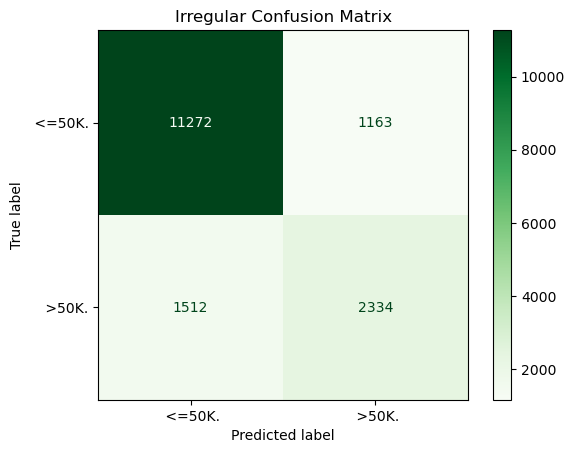

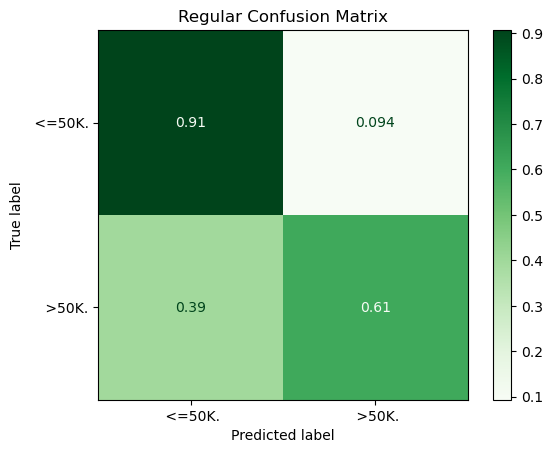

In [47]:
# Draw the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
np.set_printoptions(precision=4)
titles_options = [('Irregular Confusion Matrix',None),
                  ('Regular Confusion Matrix', 'true')]
class_names = [df_test_set['Income'][1],df_test_set['Income'][2]]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(treeClassifier, x_test, y_test,
                                 display_labels = class_names,
                                 cmap = plt.cm.Greens,
                                 normalize = normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

The best score of decision tree after grid search: 0.8585734078997552
The score of decision tree after grid search: 0.8575640316933849
The best parameters: {'max_depth': 16, 'max_features': 9, 'min_samples_leaf': 12, 'min_samples_split': 8}
Regular Confusion Matrix
[[0.9283 0.0717]
 [0.3713 0.6287]]


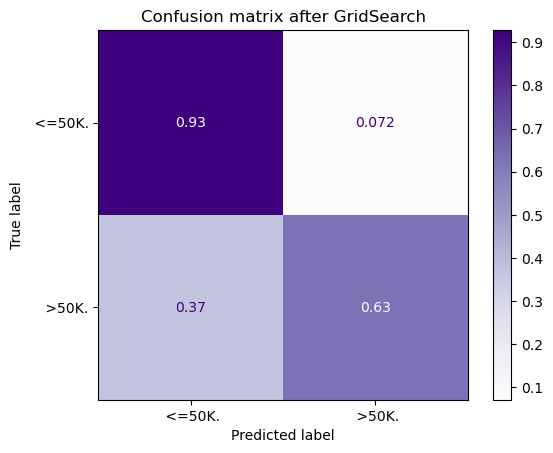

In [45]:
# Parameter Optimization
from sklearn.model_selection import GridSearchCV
paras = {'max_features':(None, 9, 6),
         'max_depth':(None, 24, 16),
         'min_samples_split':(2, 4, 8),
         'min_samples_leaf':(16, 4, 12)
    }
 
clf = GridSearchCV(treeClassifier, paras, cv = 5)
clf.fit(x_train, y_train)
clf.best_score_, clf.score(x_test, y_test), clf.best_params_
print('The best score of decision tree after grid search:', clf.best_score_)
print('The score of decision tree after grid search:', clf.score(x_test, y_test))
print('The best parameters:', clf.best_params_)
disp2 = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test,
                              display_labels = class_names,
                              cmap = plt.cm.Purples,
                              normalize = 'true')
disp2.ax_.set_title('Confusion matrix after GridSearch')
print(title)
print(disp2.confusion_matrix)

## 2. Naive Bayes Classifier

In [57]:
%%time
# The data pre-processing process of Naive Bayes Classifier is the same as in Decision Tree Classifier
# build the Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()
gaussianNB.fit(x_train, y_train)
score = gaussianNB.score(x_test, y_test)
print('Scoring of Naive Bayes Classifier :', score)


Scoring of Naive Bayes Classifier : 0.7981696455991647
CPU times: user 15.7 ms, sys: 6.77 ms, total: 22.5 ms
Wall time: 22.1 ms


In [29]:
# Validate model accuracy using cross-validation methods
from sklearn.model_selection import cross_val_score
num_validations=5
accuracy=cross_val_score(gaussianNB,x_test, y_test,
                         scoring='accuracy',cv=num_validations)
# Calculation Accuracy
print('Accuracy：{:.2f}%'.format(accuracy.mean()*100))
precision=cross_val_score(gaussianNB,x_test, y_test,
                         scoring='precision_weighted',cv=num_validations)

# Calculation Precision
print('Precision：{:.2f}%'.format(precision.mean()*100))

# Calculation Recall
recall=cross_val_score(gaussianNB,x_test, y_test,
                         scoring='recall_weighted',cv=num_validations)
print('Recall：{:.2f}%'.format(recall.mean()*100))

# Calculation F1-score
f1=cross_val_score(gaussianNB,x_test, y_test,
                         scoring='f1_weighted',cv=num_validations)
print('F1-score：{:.2f}%'.format(f1.mean()*100))

Accuracy：79.77%
Precision：77.74%
Recall：79.77%
F1-score：76.89%
